In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Practical 2

### <font color = red>Titanic dataset<font>

In [27]:
Titanic_df = pd.read_excel('Datasets/titanic.xlsx', index_col=0)
Titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [28]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [29]:
# dropping nill values in Embarked column
Titanic_df['Embarked'].dropna(inplace=True)

# Imputing mean age in Age column
Titanic_df['Age'].fillna(Titanic_df['Age'].median(), inplace=True)

In [30]:
# Checking for unqiue values in the dataset
Titanic_df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [31]:
print('unique in Pclasss: ', Titanic_df.Pclass.value_counts())
print('unique in SibSp: ', Titanic_df.SibSp.value_counts())
print('unique in Parch: ', Titanic_df.Parch.value_counts())
print('unique in Embarked: ', Titanic_df.Embarked.value_counts())

unique in Pclasss:  Pclass
3    491
1    216
2    184
Name: count, dtype: int64
unique in SibSp:  SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
unique in Parch:  Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
unique in Embarked:  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [32]:
# One hot encoding for categorical variables
Titanic_df = pd.get_dummies(Titanic_df, columns=['Sex', 'Embarked'])

In [33]:
# Extracting title from Name column
Titanic_df['NameTitle'] = Titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
Titanic_df.drop('Name', axis=1, inplace=True)

In [34]:
Titanic_df['NameTitle'].value_counts()

NameTitle
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [35]:
# Replacing rare titles with 'Rare'
rare_titles = ['the Countess', 'Capt', 'Lady', 'Sir', 'Jonkheer', 'Don', 'Major', 'Col', 'Rev', 'Dr']
Titanic_df['NameTitle'] = Titanic_df['NameTitle'].apply(lambda x: 'Rare' if x in rare_titles else x)

In [36]:
# Ordinal Encoding NameTitle column
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
Titanic_df['NameTitle'] = Titanic_df['NameTitle'].map(title_mapping)

# <font color = 'Orange'>Feature Selection</font>

In [37]:
Titanic_df.drop(columns=['Ticket', 'Cabin'], axis=1, inplace=True)

In [38]:
Titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NameTitle
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,False,True,False,False,True,1.0
2,1,1,38.0,1,0,71.2833,True,False,True,False,False,3.0
3,1,3,26.0,0,0,7.9250,True,False,False,False,True,2.0
4,1,1,35.0,1,0,53.1000,True,False,False,False,True,3.0
5,0,3,35.0,0,0,8.0500,False,True,False,False,True,1.0


<Axes: >

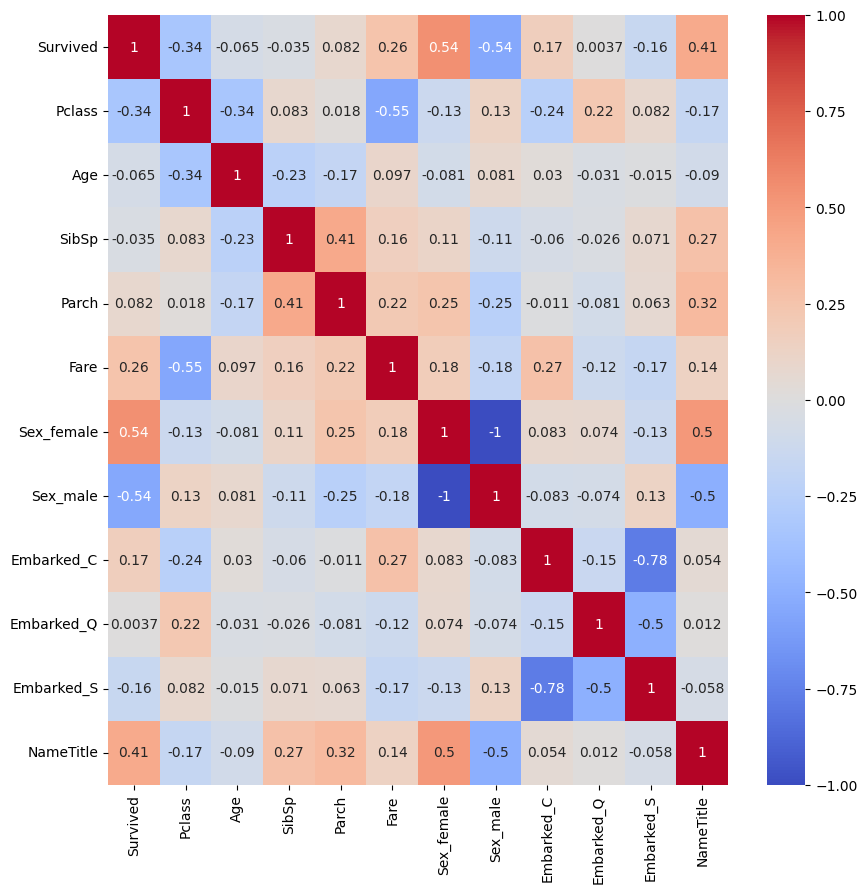

In [39]:
corr_mat = Titanic_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Density'>

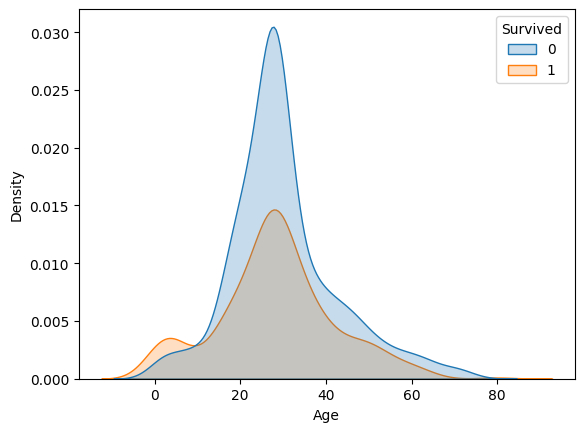

In [40]:
sns.kdeplot(data = Titanic_df, x = 'Age', hue = 'Survived', fill = True)

In [41]:
# Dropping Parch cols since it has too little correlation with Survived
Titanic_df.drop('Parch', axis=1, inplace=True)

<Axes: xlabel='NameTitle', ylabel='Density'>

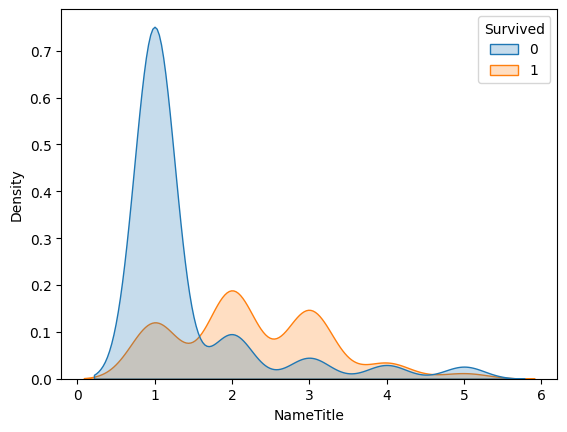

In [42]:
sns.kdeplot(data = Titanic_df, x = 'NameTitle', hue = 'Survived', fill = True)
# People Having Mr title have less survival rate

In [43]:
Titanic_df.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NameTitle
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,7.2500,False,True,False,False,True,1.0
2,1,1,38.0,1,71.2833,True,False,True,False,False,3.0
3,1,3,26.0,0,7.9250,True,False,False,False,True,2.0
4,1,1,35.0,1,53.1000,True,False,False,False,True,3.0
5,0,3,35.0,0,8.0500,False,True,False,False,True,1.0


## Building Decision Tree Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [69]:
X_train, X_test, y_train, y_test = train_test_split(Titanic_df.drop(['Survived'], axis=1), Titanic_df['Survived'], test_size=0.2, random_state=42, shuffle=True)

In [70]:
Model = DecisionTreeClassifier(max_depth=10, random_state=42)

In [71]:
Model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [74]:
print('Accuracy: ', accuracy_score(y_test, Model.predict(X_test))*100)

Accuracy:  83.79888268156425


In [73]:
report = classification_report(y_test, Model.predict(X_test), output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.827586,0.914286,0.868778,105.000000
1,0.857143,0.729730,0.788321,74.000000
accuracy,0.837989,0.837989,0.837989,0.837989
macro avg,0.842365,0.822008,0.828550,179.000000
weighted avg,0.839805,0.837989,0.835517,179.000000
